In [2]:

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime
from pandas import DataFrame

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline
import os

In [3]:
print(os.listdir())

['.git', '.ipynb_checkpoints', 'compressors_analysis.ipynb', 'data']


## Подготовка данных

В оригинальном дщокументе два листа с данными за разные временные интервалы. На первом листе данные с 10.06.2020 по 
23.06.2020. На втором листе данные с 22.05.202 по 10.06.2020. 

В оригинальном документе убираем все фильтры и поочередно сохраняем каждый лист в csv файл с разделителем полей "," и разделителем строк ". Используем для сохранения кодировку UTF-8. Сохраняю файлы с помощью LibreOffice в Linux Mint.
Соответственно получаем два файла:

In [4]:
for file in os.listdir("./data"):
    if "csv" in file:
        print(file)

10.06.2020-23.06.2020.csv
10.06.2020-23.06.2020_old.csv
10.06_filter.csv
22.05.2020-10.06.2020.csv
22.05.2020-10.06.2020_old.csv
26.05_filter.csv


In [5]:
df_22_05 = pd.read_csv("./data/22.05.2020-10.06.2020.csv")
df_10_06 = pd.read_csv("./data/10.06.2020-23.06.2020.csv")
df_22_05

,Время срабатывания,Квитировать,Сообщение
0,10.06.2020 06:18:31.764,Не квитировано,Компрессор К-113. ОТКЛЮЧЕН
1,10.06.2020 06:18:31.715,Не квитировано,Вентилятор АТ-102/1. ВКЛЮЧЕН
2,10.06.2020 06:18:31.534,Не квитировано,Соленоидный клапан К112-СR2. ЗАКРЫТ
3,10.06.2020 06:18:31.534,Не квитировано,Соленоидный клапан К112-СR2. ПОЛУЧЕНА КОМАНДА ...
4,10.06.2020 06:18:04.932,Не квитировано,Соленоидный клапан К113-СR1. ЗАКРЫТ
...,...,...,...
11026,22.05.2020 06:40:40.067,01.06.2020 5:26:58,PT-911. Давление паров на входе вентиляторов V...
11027,22.05.2020 06:40:40.067,01.06.2020 5:26:58,PT-911. Давление паров на входе вентиляторов V...
11028,22.05.2020 06:40:40.067,01.06.2020 5:26:58,PT-911. Давление паров на входе вентиляторов V...
11029,22.05.2020 06:40:40.067,01.06.2020 5:26:58,PT-911. Давление паров на входе вентиляторов V...


In [6]:
df_10_06

,Время срабатывания,Квитировать,Сообщение
0,23.06.2020 05:47:37.951,Не квитировано,Вентилятор АТ-101/1. ВКЛЮЧЕН
1,23.06.2020 05:47:37.101,Не квитировано,Вентилятор АТ-101/1. КОМАНДА - ВКЛЮЧИТЬ РЕЗЕРВ...
2,23.06.2020 05:47:37.101,Не квитировано,Вентилятор АТ-101/1. НАЗНАЧЕН РЕЖИМ ОСНОВНОЙ
3,23.06.2020 05:47:37.101,Не квитировано,Вентилятор АТ-101/1. НАЗНАЧИТЬ РЕЖИМ ОСНОВНОЙ ...
4,23.06.2020 05:47:32.225,Не квитировано,Соленоидный клапан К112-СR1. ПОЛУЧЕНА КОМАНДА ...
...,...,...,...
64995,10.06.2020 06:18:31.015,Не квитировано,Вентилятор АТ-102/1. КОМАНДА - ВКЛЮЧИТЬ РЕЗЕРВ...
64996,10.06.2020 06:18:30.617,Не квитировано,Вентилятор АТ-111/3. ВКЛЮЧЕН
64997,10.06.2020 06:18:29.917,Не квитировано,Вентилятор АТ-111/3. КОМАНДА - ВКЛЮЧИТЬ АВТОМА...
64998,10.06.2020 06:18:31.864,Не квитировано,Компрессор К-113. НАЗНАЧЕН РЕЖИМ РЕЗЕРВНЫЙ


Очевидно разбивка на два листа не имеет смылса и вызвана только техническим ограницением excel в 65000 строк. Обьединим
два датафрейма в один в хронологическом порядке.

In [7]:
df_all = pd.concat([df_10_06, df_22_05], ignore_index=True)
df_all

,Время срабатывания,Квитировать,Сообщение
0,23.06.2020 05:47:37.951,Не квитировано,Вентилятор АТ-101/1. ВКЛЮЧЕН
1,23.06.2020 05:47:37.101,Не квитировано,Вентилятор АТ-101/1. КОМАНДА - ВКЛЮЧИТЬ РЕЗЕРВ...
2,23.06.2020 05:47:37.101,Не квитировано,Вентилятор АТ-101/1. НАЗНАЧЕН РЕЖИМ ОСНОВНОЙ
3,23.06.2020 05:47:37.101,Не квитировано,Вентилятор АТ-101/1. НАЗНАЧИТЬ РЕЖИМ ОСНОВНОЙ ...
4,23.06.2020 05:47:32.225,Не квитировано,Соленоидный клапан К112-СR1. ПОЛУЧЕНА КОМАНДА ...
...,...,...,...
76026,22.05.2020 06:40:40.067,01.06.2020 5:26:58,PT-911. Давление паров на входе вентиляторов V...
76027,22.05.2020 06:40:40.067,01.06.2020 5:26:58,PT-911. Давление паров на входе вентиляторов V...
76028,22.05.2020 06:40:40.067,01.06.2020 5:26:58,PT-911. Давление паров на входе вентиляторов V...
76029,22.05.2020 06:40:40.067,01.06.2020 5:26:58,PT-911. Давление паров на входе вентиляторов V...


Посмотрим на строку сообщение

In [8]:
df_all["Сообщение"][0]

'Вентилятор АТ-101/1. ВКЛЮЧЕН'

Видим что имя компонента, к которому относится сообщение отделено от сообщения точкой.
Создадим новый датафрейм из столбца "Сообщение" используя в качестве разделителя точку. опция expand=True
сразу проведет разбиение на колонки

In [9]:
df_all_splited = df_all["Сообщение"].str.split('.', expand=True)

Переименуем колонки полученого датафрейма df_all_splited

In [10]:
df_all_splited.columns = ['component', 'm0', 'm1', 'm2', 'm3', 'm4']
df_all_splited

,component,m0,m1,m2,m3,m4
0,Вентилятор АТ-101/1,ВКЛЮЧЕН,None,None,None,None
1,Вентилятор АТ-101/1,КОМАНДА - ВКЛЮЧИТЬ РЕЗЕРВНЫЙ АГРЕГАТ КАК ДОПО...,None,None,None,None
2,Вентилятор АТ-101/1,НАЗНАЧЕН РЕЖИМ ОСНОВНОЙ,None,None,None,None
3,Вентилятор АТ-101/1,НАЗНАЧИТЬ РЕЖИМ ОСНОВНОЙ АВТОМАТИЧЕСКИ,None,None,None,None
4,Соленоидный клапан К112-СR1,"ПОЛУЧЕНА КОМАНДА ""ОТКРЫТЬ АВТОМАТИЧЕСКИ""",None,None,None,None
...,...,...,...,...,...,...
76026,PT-911,Давление паров на входе вентиляторов VD-103/A...,«Минимум предаварийный»,None,None,None
76027,PT-911,Давление паров на входе вентиляторов VD-103/A...,«Минимум аварийный»,None,None,None
76028,PT-911,Давление паров на входе вентиляторов VD-103/A...,ДОСТОВЕРЕН,None,None,None
76029,PT-911,Давление паров на входе вентиляторов VD-103/A...,«Минимум»,None,None,None


Смерджим датафрейм df_all и датафрейм df_all_splited

In [11]:
df_fin = pd.concat([df_all, df_all_splited], axis = 1)
df_fin

,Время срабатывания,Квитировать,Сообщение,component,m0,m1,m2,m3,m4
0,23.06.2020 05:47:37.951,Не квитировано,Вентилятор АТ-101/1. ВКЛЮЧЕН,Вентилятор АТ-101/1,ВКЛЮЧЕН,None,None,None,None
1,23.06.2020 05:47:37.101,Не квитировано,Вентилятор АТ-101/1. КОМАНДА - ВКЛЮЧИТЬ РЕЗЕРВ...,Вентилятор АТ-101/1,КОМАНДА - ВКЛЮЧИТЬ РЕЗЕРВНЫЙ АГРЕГАТ КАК ДОПО...,None,None,None,None
2,23.06.2020 05:47:37.101,Не квитировано,Вентилятор АТ-101/1. НАЗНАЧЕН РЕЖИМ ОСНОВНОЙ,Вентилятор АТ-101/1,НАЗНАЧЕН РЕЖИМ ОСНОВНОЙ,None,None,None,None
3,23.06.2020 05:47:37.101,Не квитировано,Вентилятор АТ-101/1. НАЗНАЧИТЬ РЕЖИМ ОСНОВНОЙ ...,Вентилятор АТ-101/1,НАЗНАЧИТЬ РЕЖИМ ОСНОВНОЙ АВТОМАТИЧЕСКИ,None,None,None,None
4,23.06.2020 05:47:32.225,Не квитировано,Соленоидный клапан К112-СR1. ПОЛУЧЕНА КОМАНДА ...,Соленоидный клапан К112-СR1,"ПОЛУЧЕНА КОМАНДА ""ОТКРЫТЬ АВТОМАТИЧЕСКИ""",None,None,None,None
...,...,...,...,...,...,...,...,...,...
76026,22.05.2020 06:40:40.067,01.06.2020 5:26:58,PT-911. Давление паров на входе вентиляторов V...,PT-911,Давление паров на входе вентиляторов VD-103/A...,«Минимум предаварийный»,None,None,None
76027,22.05.2020 06:40:40.067,01.06.2020 5:26:58,PT-911. Давление паров на входе вентиляторов V...,PT-911,Давление паров на входе вентиляторов VD-103/A...,«Минимум аварийный»,None,None,None
76028,22.05.2020 06:40:40.067,01.06.2020 5:26:58,PT-911. Давление паров на входе вентиляторов V...,PT-911,Давление паров на входе вентиляторов VD-103/A...,ДОСТОВЕРЕН,None,None,None
76029,22.05.2020 06:40:40.067,01.06.2020 5:26:58,PT-911. Давление паров на входе вентиляторов V...,PT-911,Давление паров на входе вентиляторов VD-103/A...,«Минимум»,None,None,None


Посмотрим форму финального датафрейма

In [12]:
df_fin.shape
# 76031 строк
# 9 столбцов

(76031, 9)

In [75]:
df_fin.index
df_fin["Время срабатывания"] = pd.to_datetime(df_fin['Время срабатывания'])
df_fin["Время срабатывания"]

0       2020-06-23 05:47:37.951
1       2020-06-23 05:47:37.101
2       2020-06-23 05:47:37.101
3       2020-06-23 05:47:37.101
4       2020-06-23 05:47:32.225
                  ...          
76026   2020-05-22 06:40:40.067
76027   2020-05-22 06:40:40.067
76028   2020-05-22 06:40:40.067
76029   2020-05-22 06:40:40.067
76030   2020-05-22 06:40:31.867
Name: Время срабатывания, Length: 76031, dtype: datetime64[ns]

In [15]:
plt.style.use('fivethirtyeight')

In [17]:
x = np.linspace(0, 10, 76031)
x

array([0.00000000e+00, 1.31527029e-04, 2.63054058e-04, ...,
       9.99973695e+00, 9.99986847e+00, 1.00000000e+01])

In [18]:
y = np.sin(x) + dy * np.random.randn(50)

NameError: name 'dy' is not defined

In [40]:
#df_fin_tf = df_fin
df_fin["temp"] = df_fin.m0 == "ПУСК НЕВОЗМОЖЕН"
#df["pop"] = np.where(df["pop"] > 2, 3.7 + df.index, df["pop"]*1.1)
df_fin["temp"]

# df["temp"] = df.state == "Ohio"
# df["pop"] = np.where(df["pop"] > 2, 3.7 + df.index, df["pop"]*1.1)

0        False
1        False
2        False
3        False
4        False
         ...  
76026    False
76027    False
76028    False
76029    False
76030    False
Name: temp, Length: 76031, dtype: bool

In [41]:
df_fin.groupby("temp").count()

,Время срабатывания,Квитировать,Сообщение,component,m0,m1,m2,m3,m4
temp,,,,,,,,,
False,76031,76031,76031,76031,75991,35193,4227,591,36


In [38]:
df_fin.groupby("m0").count().tail(60)

,Время срабатывания,Квитировать,Сообщение,component,m1,m2,m3,m4,temp
m0,,,,,,,,,
Нажата кнопка маскировать сигнал: Отсутствие аварии задвижки V-2,1,1,1,1,0,0,0,0,1
Низкое давление на линии всасывания по датчику,67,67,67,67,67,0,0,0,67
Низкое давление на линии всасывания по реле,16,16,16,16,16,0,0,0,16
Низкое давление на линии подачи масла по реле,5,5,5,5,5,5,0,0,5
ОТКЛЮЧЕН,5400,5400,5400,5400,1,0,0,0,5400
ОТКРЫВАЕТСЯ,127,127,127,127,0,0,0,0,127
ОТКРЫВАЕТСЯ В РЕЖИМЕ ИМИТАЦИИ,5,5,5,5,0,0,0,0,5
ОТКРЫТ,1446,1446,1446,1446,0,0,0,0,1446
ОТКРЫТА,197,197,197,197,0,0,0,0,197


In [39]:
df_fin.groupby("m0").count().head(60)

,Время срабатывания,Квитировать,Сообщение,component,m1,m2,m3,m4,temp
m0,,,,,,,,,
,9,9,9,9,3,0,0,0,9
80,44,44,44,44,0,0,0,0,44
81,43,43,43,43,0,0,0,0,43
LT-911,7,7,7,7,7,7,7,0,7
LT-951,6,6,6,6,6,6,6,0,6
LT-961,18,18,18,18,18,18,18,0,18
ModBus RTU,79,79,79,79,79,79,0,0,79
PDT-901,7,7,7,7,7,7,7,0,7
PDT-902,7,7,7,7,7,7,7,0,7


In [45]:
df_fin.m0.value_counts().head(50)

 Перепад давления паров на входе/выходе теплообменников АТ-5, АТ-6        24885
 ОТКЛЮЧЕН                                                                  5400
 ВКЛЮЧЕН                                                                   5372
 КОМАНДА - ОТКЛЮЧИТЬ АВТОМАТИЧЕСКИ                                         5160
 КОМАНДА - ВКЛЮЧИТЬ АВТОМАТИЧЕСКИ                                          4684
 ЗАДЕРЖКА                                                                  2891
 ЗАДЕРЖКА СНЯТА                                                            2889
 Защита компрессора К-111 от низкого давления масла                        2362
 ПОЛУЧЕНА КОМАНДА "ОТКРЫТЬ АВТОМАТИЧЕСКИ"                                  1450
 ОТКРЫТ                                                                    1446
 Задвижка V-3                                                              1432
 ЗАКРЫТ                                                                    1078
 ПОЛУЧЕНА КОМАНДА "ЗАКРЫТЬ АВТОМАТИЧЕСКИ

In [69]:
df_fin["temp"] = df_fin.m0 == " ВКЛЮЧЕН"
# df_fin["temp"] = np.where('PT-912	' in df_fin.m0, 1, 0)
# df_fin["temp"] = np.where('Р' in df_fin.m0, 1, 0)
#np.where(x > 0, 12, x)
df_fin["temp"]

0         True
1        False
2        False
3        False
4        False
         ...  
76026    False
76027    False
76028    False
76029    False
76030    False
Name: temp, Length: 76031, dtype: bool

In [70]:
df_fin.groupby("temp").count()

,Время срабатывания,Квитировать,Сообщение,component,m0,m1,m2,m3,m4
temp,,,,,,,,,
False,70659,70659,70659,70659,70619,35193,4227,591,36
True,5372,5372,5372,5372,5372,0,0,0,0


In [71]:
df_fin["temp"] = df_fin.m0 == " НЕТ НАПРЯЖЕНИЯ В СХЕМЕ УПРАВЛЕНИЯ"
# df_fin["temp"] = np.where('PT-912	' in df_fin.m0, 1, 0)
# df_fin["temp"] = np.where('Р' in df_fin.m0, 1, 0)
#np.where(x > 0, 12, x)
df_fin["temp"]

0        False
1        False
2        False
3        False
4        False
         ...  
76026    False
76027    False
76028    False
76029    False
76030    False
Name: temp, Length: 76031, dtype: bool

In [73]:
df_fin.groupby("temp").count()

,Время срабатывания,Квитировать,Сообщение,component,m0,m1,m2,m3,m4
temp,,,,,,,,,
False,75796,75796,75796,75796,75756,35193,4227,591,36
True,235,235,235,235,235,0,0,0,0


In [ ]:
# df_fin["temp"] = np.where(df_fin.m0 == " НЕТ НАПРЯЖЕНИЯ В СХЕМЕ УПРАВЛЕНИЯ", 1, 0)

In [72]:
for i in range(10):
    print(df_fin.m0[i])

 ВКЛЮЧЕН
 КОМАНДА - ВКЛЮЧИТЬ РЕЗЕРВНЫЙ АГРЕГАТ КАК ДОПОЛНИТЕЛЬНЫЙ АВТОМАТИЧЕСКИ
 НАЗНАЧЕН РЕЖИМ ОСНОВНОЙ
 НАЗНАЧИТЬ РЕЖИМ ОСНОВНОЙ АВТОМАТИЧЕСКИ
 ПОЛУЧЕНА КОМАНДА "ОТКРЫТЬ АВТОМАТИЧЕСКИ"
 ОТКРЫТ
 ВКЛЮЧЕН
 НАЗНАЧЕН РЕЖИМ ОСНОВНОЙ
 НАЗНАЧИТЬ РЕЖИМ ОСНОВНОЙ АВТОМАТИЧЕСКИ
 КОМАНДА - ВКЛЮЧИТЬ РЕЗЕРВНЫЙ АГРЕГАТ КАК ДОПОЛНИТЕЛЬНЫЙ АВТОМАТИЧЕСКИ


Text(0, 0.5, 'Значение')

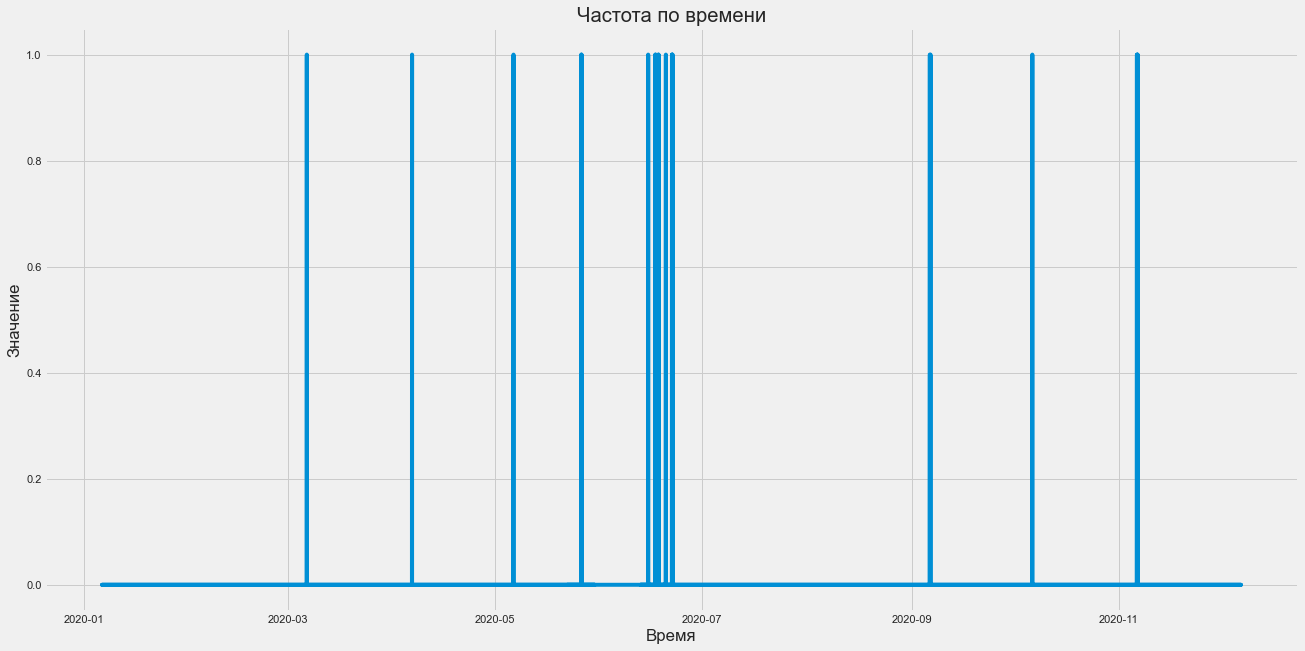

In [74]:
plt.figure(figsize=(20, 10))
plt.plot(df_fin["Время срабатывания"], df_fin["temp"])
plt.title("Частота по времени")
plt.xlabel("Время")
plt.ylabel("Значение")

In [77]:
df_fin.T.T

,Время срабатывания,Квитировать,Сообщение,component,m0,m1,m2,m3,m4,temp
0,2020-06-23 05:47:37.951,Не квитировано,Вентилятор АТ-101/1. ВКЛЮЧЕН,Вентилятор АТ-101/1,ВКЛЮЧЕН,None,None,None,None,False
1,2020-06-23 05:47:37.101,Не квитировано,Вентилятор АТ-101/1. КОМАНДА - ВКЛЮЧИТЬ РЕЗЕРВ...,Вентилятор АТ-101/1,КОМАНДА - ВКЛЮЧИТЬ РЕЗЕРВНЫЙ АГРЕГАТ КАК ДОПО...,None,None,None,None,False
2,2020-06-23 05:47:37.101,Не квитировано,Вентилятор АТ-101/1. НАЗНАЧЕН РЕЖИМ ОСНОВНОЙ,Вентилятор АТ-101/1,НАЗНАЧЕН РЕЖИМ ОСНОВНОЙ,None,None,None,None,False
3,2020-06-23 05:47:37.101,Не квитировано,Вентилятор АТ-101/1. НАЗНАЧИТЬ РЕЖИМ ОСНОВНОЙ ...,Вентилятор АТ-101/1,НАЗНАЧИТЬ РЕЖИМ ОСНОВНОЙ АВТОМАТИЧЕСКИ,None,None,None,None,False
4,2020-06-23 05:47:32.225,Не квитировано,Соленоидный клапан К112-СR1. ПОЛУЧЕНА КОМАНДА ...,Соленоидный клапан К112-СR1,"ПОЛУЧЕНА КОМАНДА ""ОТКРЫТЬ АВТОМАТИЧЕСКИ""",None,None,None,None,False
...,...,...,...,...,...,...,...,...,...,...
76026,2020-05-22 06:40:40.067,01.06.2020 5:26:58,PT-911. Давление паров на входе вентиляторов V...,PT-911,Давление паров на входе вентиляторов VD-103/A...,«Минимум предаварийный»,None,None,None,False
76027,2020-05-22 06:40:40.067,01.06.2020 5:26:58,PT-911. Давление паров на входе вентиляторов V...,PT-911,Давление паров на входе вентиляторов VD-103/A...,«Минимум аварийный»,None,None,None,False
76028,2020-05-22 06:40:40.067,01.06.2020 5:26:58,PT-911. Давление паров на входе вентиляторов V...,PT-911,Давление паров на входе вентиляторов VD-103/A...,ДОСТОВЕРЕН,None,None,None,False
76029,2020-05-22 06:40:40.067,01.06.2020 5:26:58,PT-911. Давление паров на входе вентиляторов V...,PT-911,Давление паров на входе вентиляторов VD-103/A...,«Минимум»,None,None,None,False


In [85]:
df_fin_sort = df_fin.iloc[::-1,::]
df_fin_sort

,Время срабатывания,Квитировать,Сообщение,component,m0,m1,m2,m3,m4,temp
76030,2020-05-22 06:40:31.867,Не квитировано,PT-911. Давление паров на входе вентиляторов V...,PT-911,Давление паров на входе вентиляторов VD-103/A...,НЕДОСТОВЕРНОСТЬ,ВПД,None,None,False
76029,2020-05-22 06:40:40.067,01.06.2020 5:26:58,PT-911. Давление паров на входе вентиляторов V...,PT-911,Давление паров на входе вентиляторов VD-103/A...,«Минимум»,None,None,None,False
76028,2020-05-22 06:40:40.067,01.06.2020 5:26:58,PT-911. Давление паров на входе вентиляторов V...,PT-911,Давление паров на входе вентиляторов VD-103/A...,ДОСТОВЕРЕН,None,None,None,False
76027,2020-05-22 06:40:40.067,01.06.2020 5:26:58,PT-911. Давление паров на входе вентиляторов V...,PT-911,Давление паров на входе вентиляторов VD-103/A...,«Минимум аварийный»,None,None,None,False
76026,2020-05-22 06:40:40.067,01.06.2020 5:26:58,PT-911. Давление паров на входе вентиляторов V...,PT-911,Давление паров на входе вентиляторов VD-103/A...,«Минимум предаварийный»,None,None,None,False
...,...,...,...,...,...,...,...,...,...,...
4,2020-06-23 05:47:32.225,Не квитировано,Соленоидный клапан К112-СR1. ПОЛУЧЕНА КОМАНДА ...,Соленоидный клапан К112-СR1,"ПОЛУЧЕНА КОМАНДА ""ОТКРЫТЬ АВТОМАТИЧЕСКИ""",None,None,None,None,False
3,2020-06-23 05:47:37.101,Не квитировано,Вентилятор АТ-101/1. НАЗНАЧИТЬ РЕЖИМ ОСНОВНОЙ ...,Вентилятор АТ-101/1,НАЗНАЧИТЬ РЕЖИМ ОСНОВНОЙ АВТОМАТИЧЕСКИ,None,None,None,None,False
2,2020-06-23 05:47:37.101,Не квитировано,Вентилятор АТ-101/1. НАЗНАЧЕН РЕЖИМ ОСНОВНОЙ,Вентилятор АТ-101/1,НАЗНАЧЕН РЕЖИМ ОСНОВНОЙ,None,None,None,None,False
1,2020-06-23 05:47:37.101,Не квитировано,Вентилятор АТ-101/1. КОМАНДА - ВКЛЮЧИТЬ РЕЗЕРВ...,Вентилятор АТ-101/1,КОМАНДА - ВКЛЮЧИТЬ РЕЗЕРВНЫЙ АГРЕГАТ КАК ДОПО...,None,None,None,None,False


(737413.4199849975, 737782.8023080234)

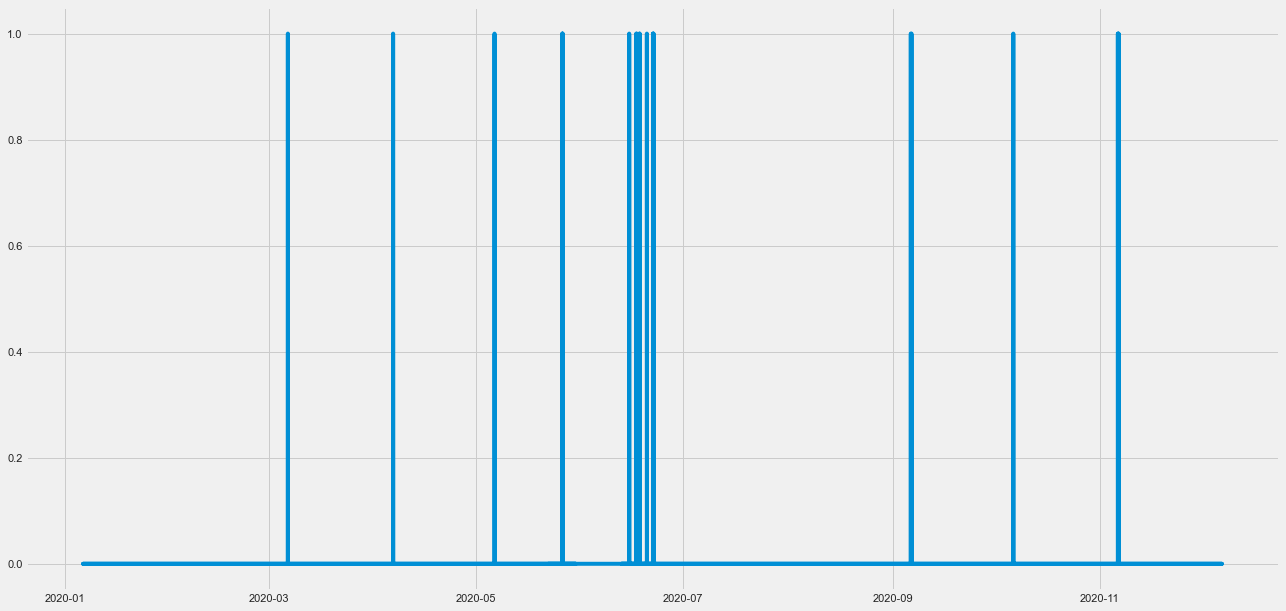

In [121]:
# fig, ax = plt.subplots(figsize=(16,10), dpi= 80)   
# axes = plt.gca()
# axes.set_xlim(['2020-05-22 06:40:31.867','2020-06-23 05:47:37.951'])
# axes.plot(df_fin_sort["Время срабатывания"], df_fin_sort["temp"])
# axes.title("Частота по времени")
# axes.set_ylim([ymin,ymax])
# plt.figure(figsize=(30, 15), dpi= 300)
# plt.figure(figsize=(20, 10))
# plt.plot(df_fin_sort["Время срабатывания"], df_fin_sort["temp"])
# plt.title("Частота по времени")
# plt.xlabel("Время")
# plt.ylabel("Значение")
# plt.grid(True)
# plt.axis(df_fin_sort["Время срабатывания"],'2020-05-22 06:40:31.867','2020-06-23 05:47:37.951')
# plt.savefig('filename.png', dpi=300)

plt.figure(figsize=(20, 10))
axes = plt.subplot()

axes.plot(df_fin_sort["Время срабатывания"].values, df_fin_sort["temp"])
xlim = axes.get_xlim()
# example of how to zoomout by a factor of 0.1
factor = 0.0001
new_xlim = (xlim[0] + xlim[1])/2 + np.array((-0.5, 0.5)) * (xlim[1] - xlim[0]) * (1 + factor) 
axes.set_xlim(new_xlim)


Text(0, 0.5, 'Значение')

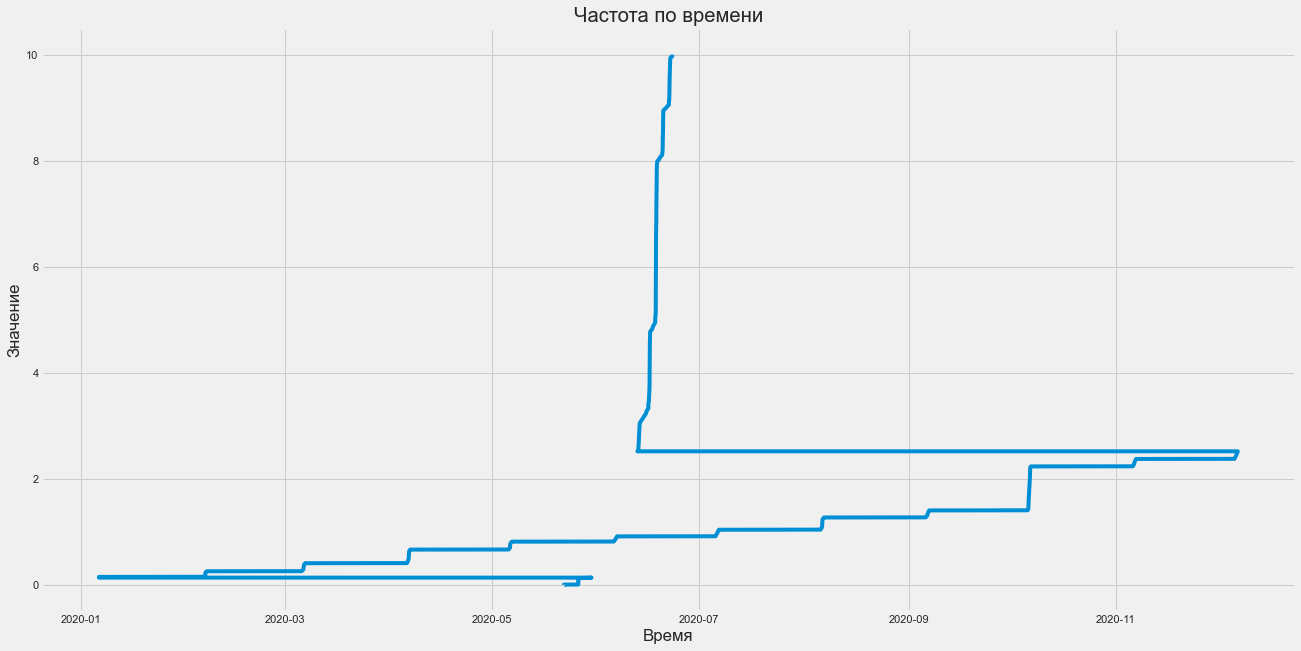

In [120]:
plt.figure(figsize=(20, 10))
plt.plot(df_fin_sort["Время срабатывания"].values, x)
plt.title("Частота по времени")
plt.xlabel("Время")
plt.ylabel("Значение")

In [119]:
df_fin_sort["Время срабатывания"].values

array(['2020-05-22T06:40:31.867000000', '2020-05-22T06:40:40.067000000',
       '2020-05-22T06:40:40.067000000', ...,
       '2020-06-23T05:47:37.101000000', '2020-06-23T05:47:37.101000000',
       '2020-06-23T05:47:37.951000000'], dtype='datetime64[ns]')

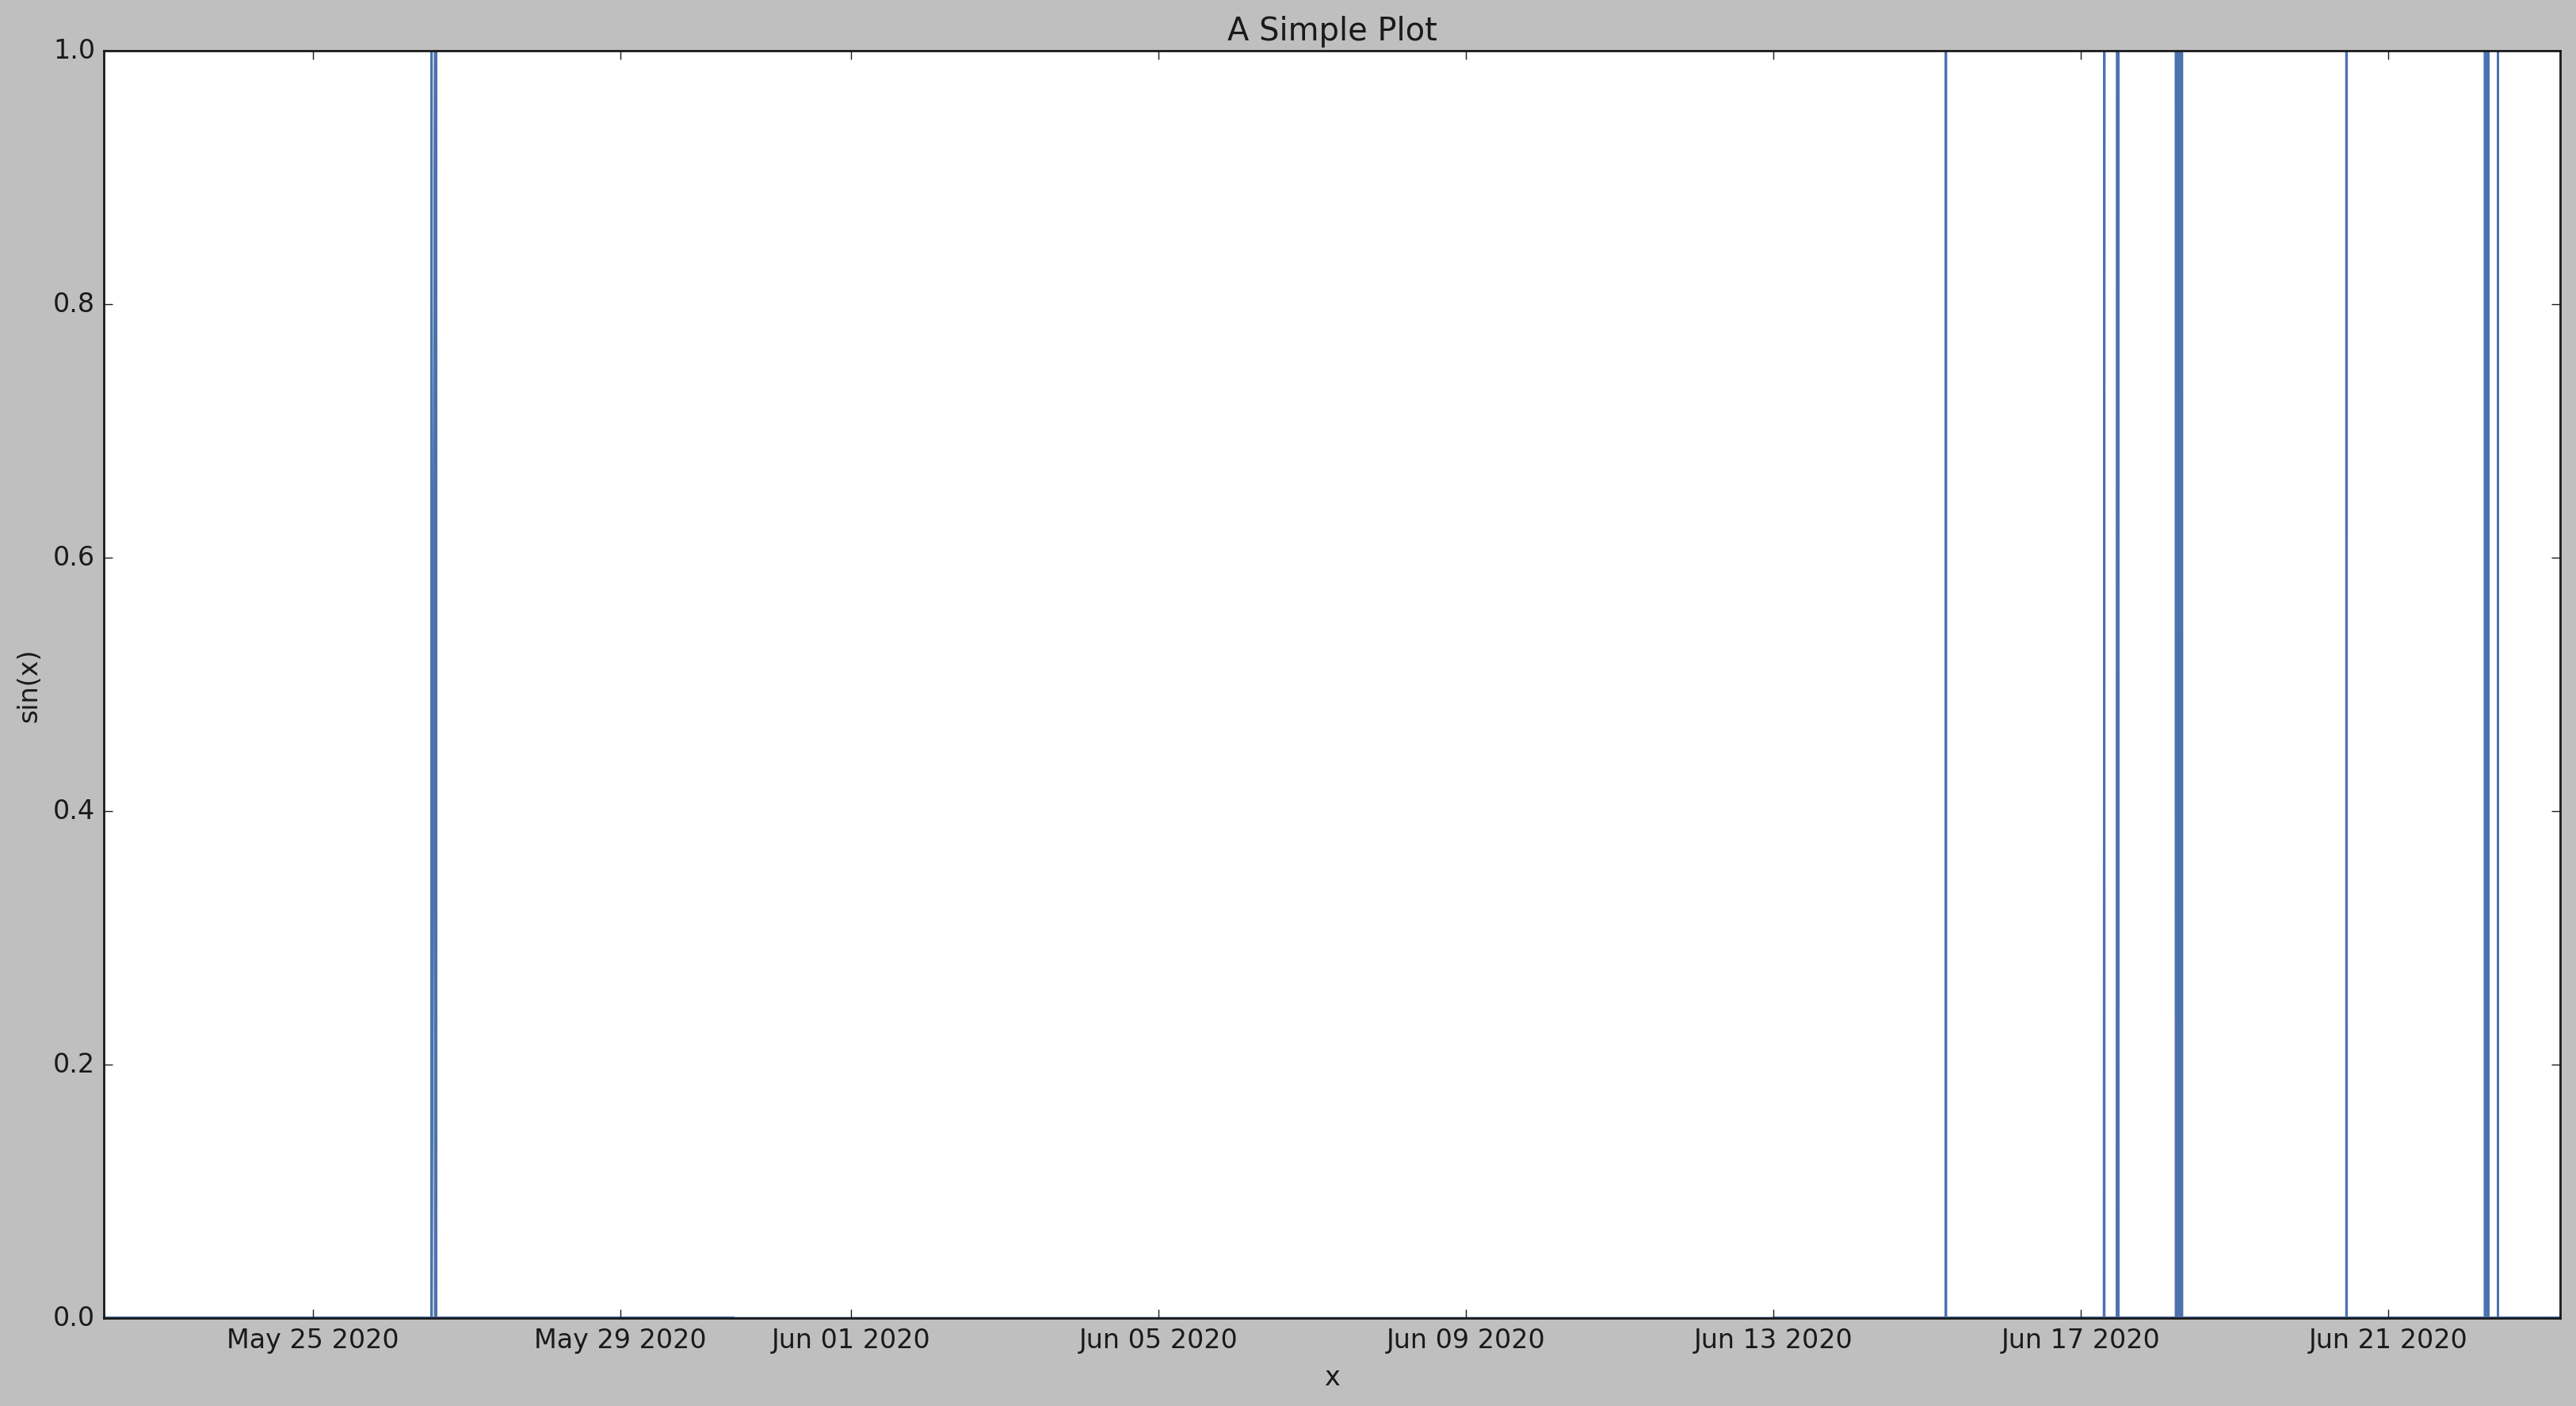

In [127]:
# plt.style.use('seaborn-whitegrid')
plt.style.use('classic')
plt.figure(figsize=(20, 10), dpi=200)
ax = plt.axes()
ax.plot(df_fin_sort["Время срабатывания"], df_fin_sort["temp"])
ax.set(xlim=('2020-05-22T06:40:31.867000000', '2020-06-23T05:47:37.951000000'), ylim=(0, 1),
       xlabel='x', ylabel='sin(x)',
       title='A Simple Plot');

In [142]:
#df_fin["temp"] = df_fin.m0 == " НЕТ НАПРЯЖЕНИЯ В СХЕМЕ УПРАВЛЕНИЯ"
df_voltage = df_fin_sort.loc[df_fin_sort.m0 == " НЕТ НАПРЯЖЕНИЯ В СХЕМЕ УПРАВЛЕНИЯ", ["Время срабатывания", "m0"]]
df_voltage

,Время срабатывания,m0
75988,2020-05-26 12:57:08.126,НЕТ НАПРЯЖЕНИЯ В СХЕМЕ УПРАВЛЕНИЯ
75987,2020-05-26 12:57:08.127,НЕТ НАПРЯЖЕНИЯ В СХЕМЕ УПРАВЛЕНИЯ
75986,2020-05-26 12:57:08.129,НЕТ НАПРЯЖЕНИЯ В СХЕМЕ УПРАВЛЕНИЯ
75985,2020-05-26 12:57:08.129,НЕТ НАПРЯЖЕНИЯ В СХЕМЕ УПРАВЛЕНИЯ
75984,2020-05-26 12:57:08.130,НЕТ НАПРЯЖЕНИЯ В СХЕМЕ УПРАВЛЕНИЯ
...,...,...
6757,2020-06-22 07:04:23.961,НЕТ НАПРЯЖЕНИЯ В СХЕМЕ УПРАВЛЕНИЯ
6756,2020-06-22 07:04:24.660,НЕТ НАПРЯЖЕНИЯ В СХЕМЕ УПРАВЛЕНИЯ
6755,2020-06-22 07:04:25.261,НЕТ НАПРЯЖЕНИЯ В СХЕМЕ УПРАВЛЕНИЯ
6636,2020-06-22 07:21:55.376,НЕТ НАПРЯЖЕНИЯ В СХЕМЕ УПРАВЛЕНИЯ


In [144]:
#df_voltage = df_voltage.loc[df_voltage["Время срабатывания"]<'2020-05-27 12:57:08.130', ["Время срабатывания", "m0"]]
df_voltage.head(60)

,Время срабатывания,m0
75988,2020-05-26 12:57:08.126,НЕТ НАПРЯЖЕНИЯ В СХЕМЕ УПРАВЛЕНИЯ
75987,2020-05-26 12:57:08.127,НЕТ НАПРЯЖЕНИЯ В СХЕМЕ УПРАВЛЕНИЯ
75986,2020-05-26 12:57:08.129,НЕТ НАПРЯЖЕНИЯ В СХЕМЕ УПРАВЛЕНИЯ
75985,2020-05-26 12:57:08.129,НЕТ НАПРЯЖЕНИЯ В СХЕМЕ УПРАВЛЕНИЯ
75984,2020-05-26 12:57:08.130,НЕТ НАПРЯЖЕНИЯ В СХЕМЕ УПРАВЛЕНИЯ
75983,2020-05-26 12:57:08.132,НЕТ НАПРЯЖЕНИЯ В СХЕМЕ УПРАВЛЕНИЯ
75982,2020-05-26 12:57:08.132,НЕТ НАПРЯЖЕНИЯ В СХЕМЕ УПРАВЛЕНИЯ
75981,2020-05-26 12:57:08.134,НЕТ НАПРЯЖЕНИЯ В СХЕМЕ УПРАВЛЕНИЯ
75980,2020-05-26 12:57:08.135,НЕТ НАПРЯЖЕНИЯ В СХЕМЕ УПРАВЛЕНИЯ
75979,2020-05-26 12:57:08.135,НЕТ НАПРЯЖЕНИЯ В СХЕМЕ УПРАВЛЕНИЯ


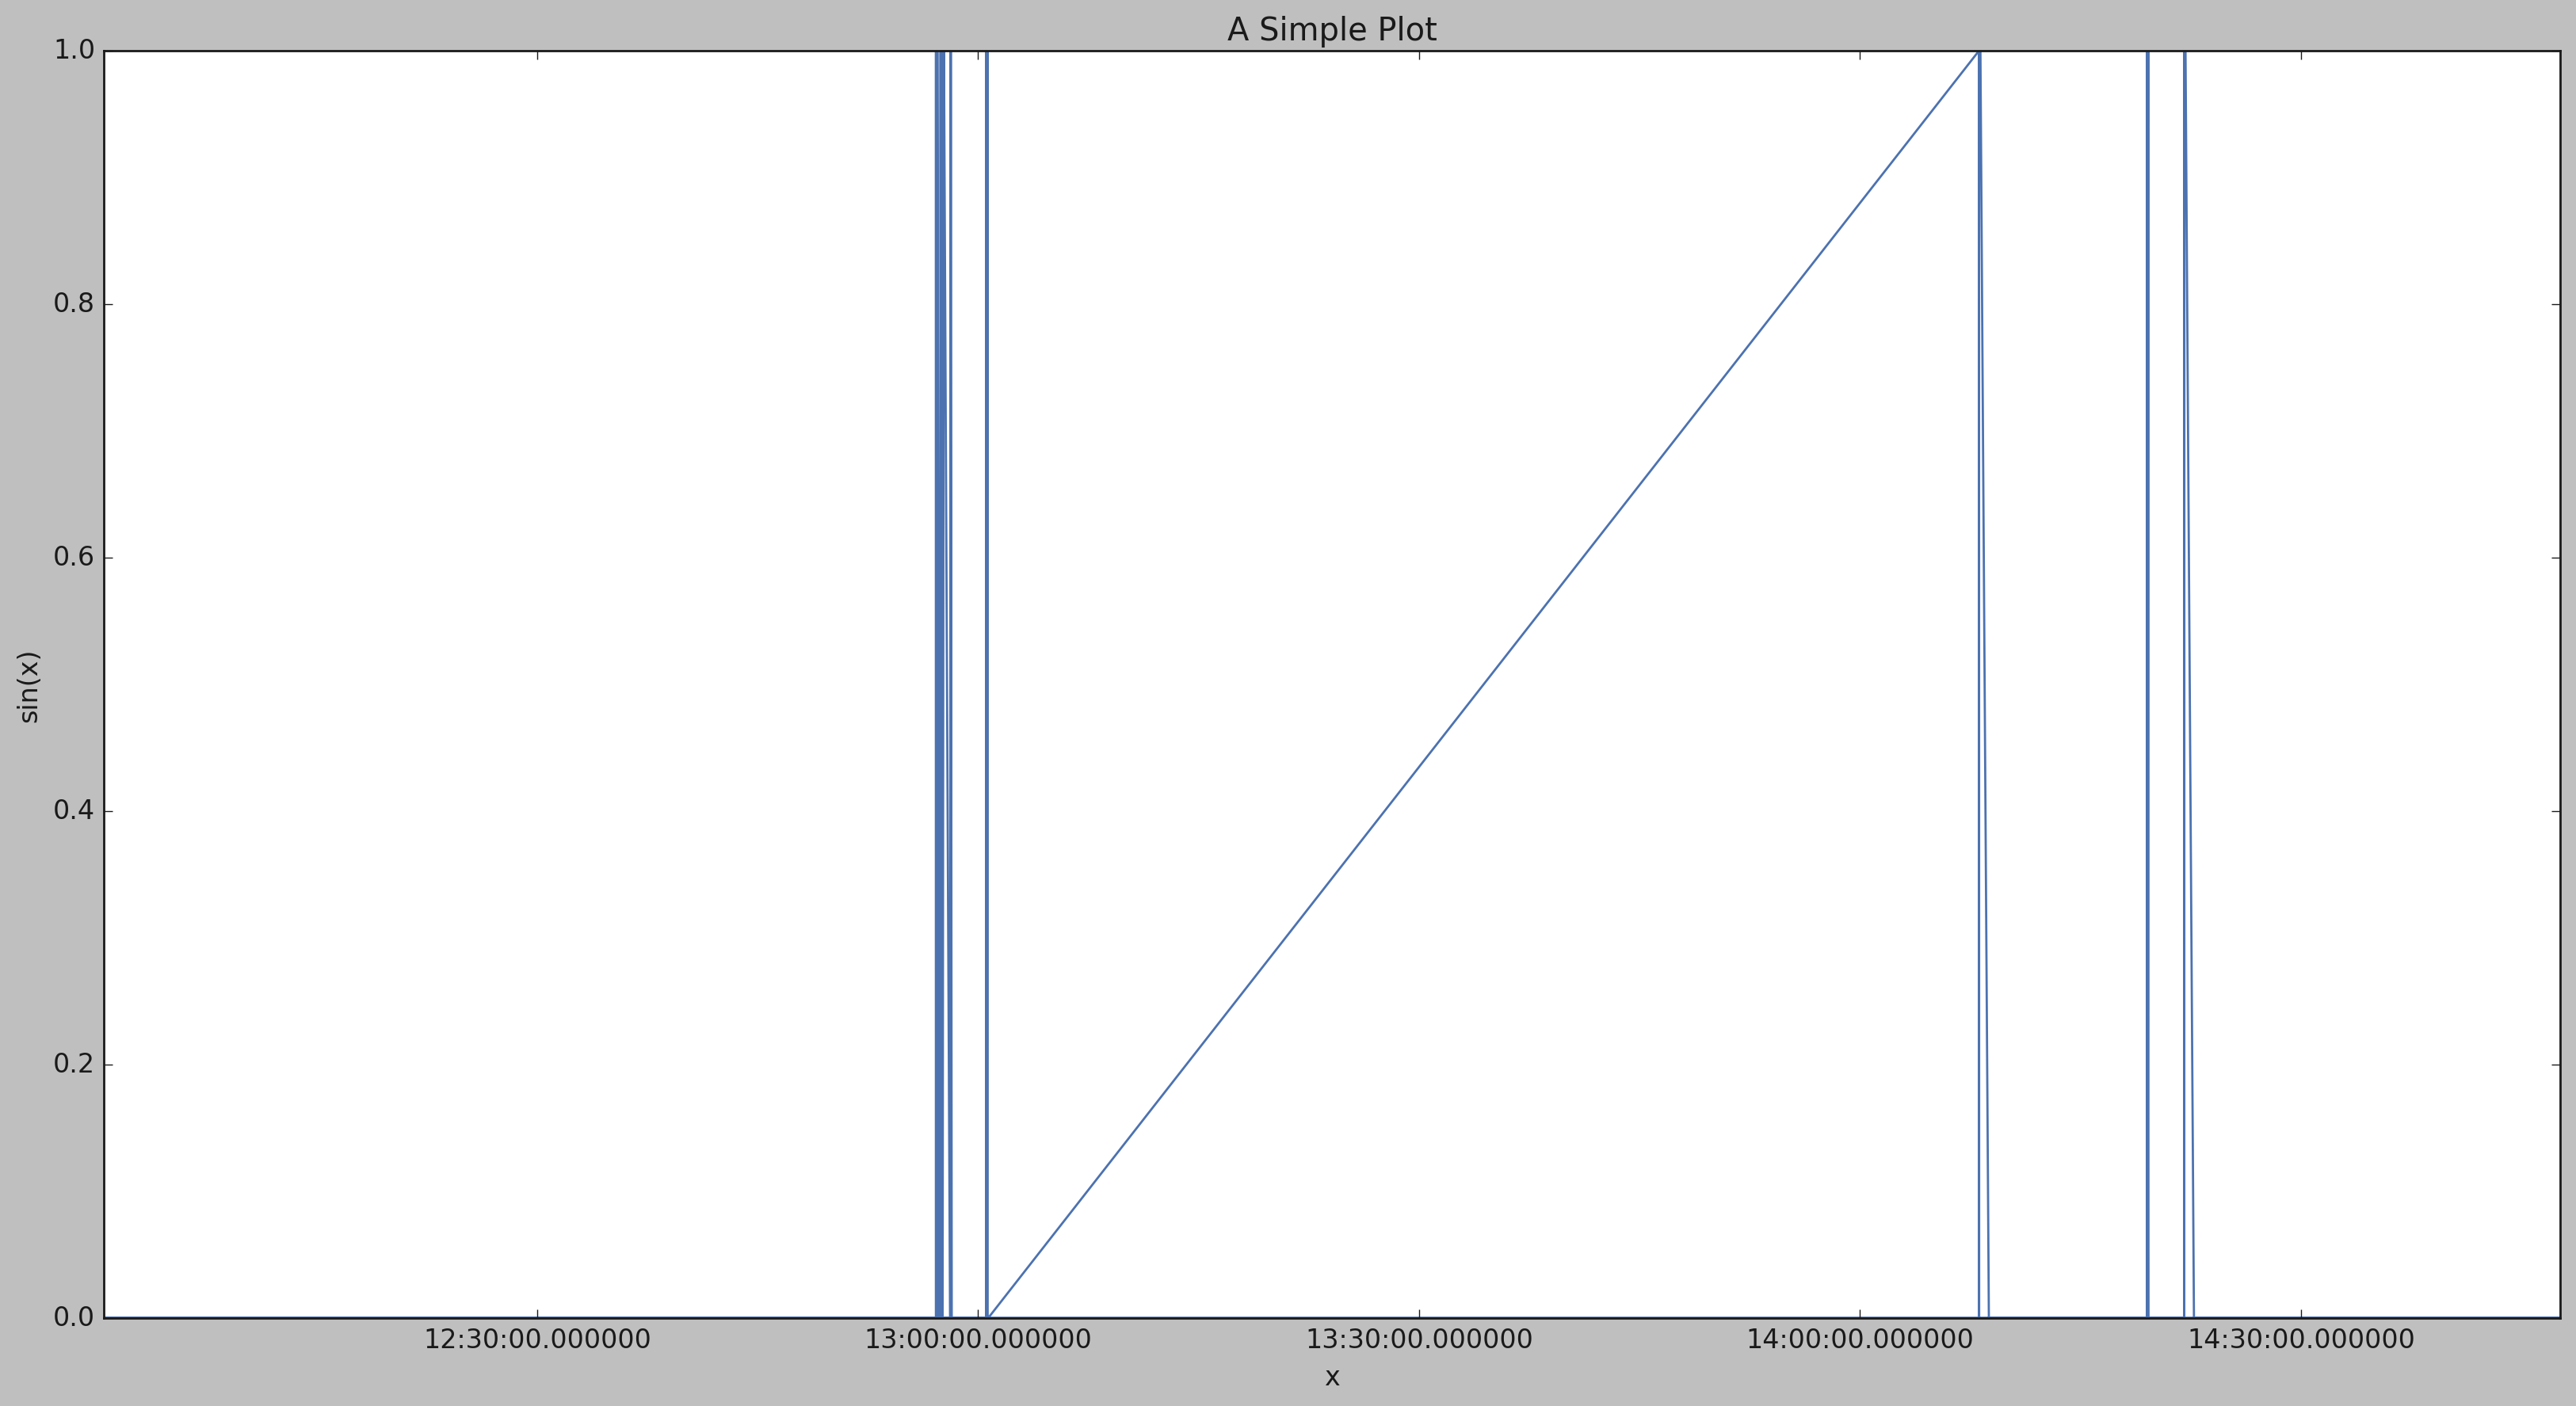

In [148]:
plt.style.use('classic')
plt.figure(figsize=(20, 10), dpi=200)
ax = plt.axes()
ax.plot(df_fin_sort["Время срабатывания"], df_fin_sort["temp"])
ax.set(xlim=('2020-05-26T12:00:31.867000000', '2020-05-26T14:47:37.951000000'), ylim=(0, 1),
       xlabel='x', ylabel='sin(x)',
       title='A Simple Plot');